<a href="https://colab.research.google.com/github/Uzair-DeVops/Deep_Learing_Projects_Computer_Vision/blob/main/birds_vs_drone_using_MobileNetV2_acc%3C%3C92_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
muhammadsaoodsarwar_drone_vs_bird_path = kagglehub.dataset_download('muhammadsaoodsarwar/drone-vs-bird')

print('Data source import complete.')


Data source import complete.


# Import Libraries

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Define dataset parameters


In [7]:
image_height = 224
image_width = 224
num_channels = 3
batch_size = 32
num_classes = 2

# Get Image From each Directory ( Visualization)


In [8]:
data_path=r'/kaggle/input/drone-vs-bird/dataset'
image_classes = os.listdir(data_path)
print(image_classes)

['bird', 'drone']


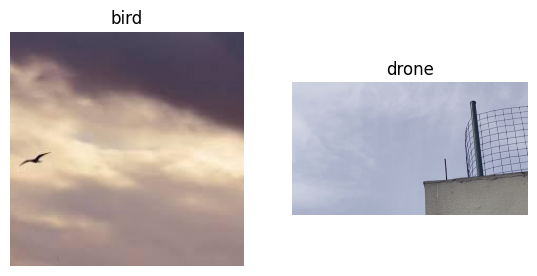

In [9]:
def plot_image(image_classes):
    plt.figure(figsize=(14 , 14))

    for i , category in enumerate(image_classes):
        image_path = data_path + '/' + category
        images_in_folder = os.listdir(image_path)

        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image

        img= image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255

        plt.subplot(4 , 4 , i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()
plot_image(image_classes)

In [10]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split for training and validation
)

# Preprocessing Data & Split Data into Train & Test


In [11]:
train_data = train_datagen.flow_from_directory(
    r'/kaggle/input/drone-vs-bird/dataset',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

Found 3284 images belonging to 2 classes.


In [12]:
val_data = train_datagen.flow_from_directory(
    r'/kaggle/input/drone-vs-bird/dataset',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

Found 820 images belonging to 2 classes.


# Load the pre-trained MobileNetV2 model


In [13]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, num_channels))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
#Freeze the base model's layers to retain pre-trained weights
base_model.trainable = False

# Build the model

In [15]:
model = Sequential([
    base_model,  # Add the pre-trained model as the base
    GlobalAveragePooling2D(),  # Add a pooling layer
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.3),  # Dropout for regularization
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the Model


In [16]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the Model


In [18]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.8397 - loss: 0.3610 - val_accuracy: 0.8817 - val_loss: 0.2955 - learning_rate: 0.0010
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.9693 - loss: 0.0842 - val_accuracy: 0.9159 - val_loss: 0.2170 - learning_rate: 0.0010
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9749 - loss: 0.0682 - val_accuracy: 0.9000 - val_loss: 0.2740 - learning_rate: 0.0010
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.9764 - loss: 0.0739 - val_accuracy: 0.8939 - val_loss: 0.2806 - learning_rate: 0.0010
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.9737 - loss: 0.0728 - val_accuracy: 0.8732 - val_loss: 0.3827 - learning_rate: 0.0010
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.9839 - loss: 0.0433 - val_accuracy: 0.9244 - val_loss: 0.2190 - learning_rate: 5.0000e-04
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.9876 - loss

# Evaluate The Model Accuracy & Visualize Results

In [19]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9256 - loss: 0.2241
Validation Loss: 0.21062763035297394
Validation Accuracy: 0.9304878115653992


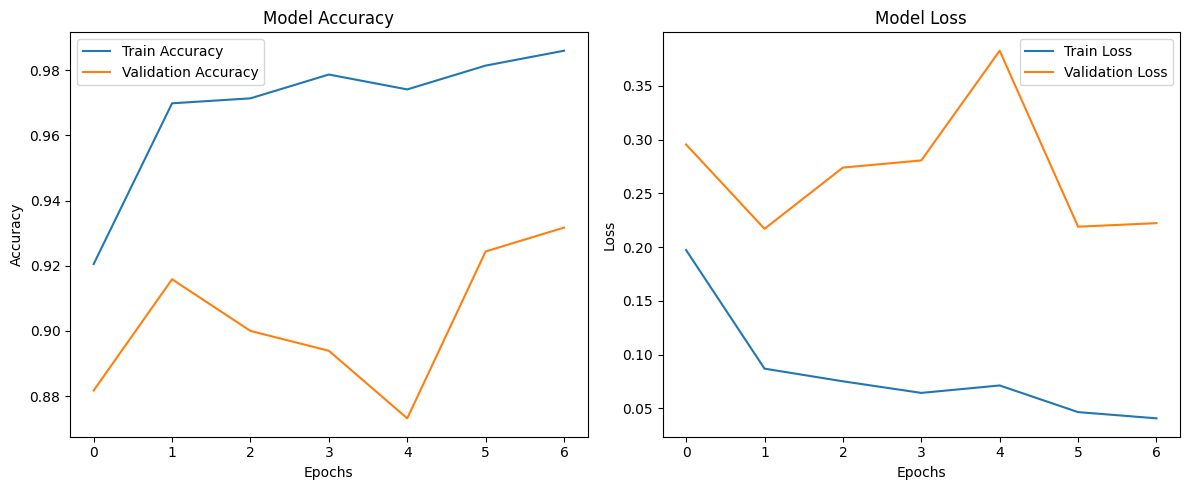

In [20]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Save Model as h5

In [21]:
# Save the final trained model
model.save("Drone vs Bird.h5")
